In [4]:
import numpy as np
import pandas as pd
from tqdm import tqdm

from correlation import (
    create_buckets, 
    calc_contingency_table, 
    chi_squared_statistic,
)
from utils import (
    plot_contingency_table,
    plot_binorm_distr_2d,
    plot_binorm_distr_3d,
)
from integrals import (
    calc_integral_between
)

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
df = pd.read_csv('data/fake_insurance_data.csv')
df.head(10)

,car_color,driver_age,area,mileage,car_size
0,black,26.377219,suburbs,156806.288398,XXL
1,black,58.976840,suburbs,74400.323559,XL
2,multicolor,55.744988,downtown,267856.748015,XXL
3,metalic,57.629139,downtown,259028.249060,XXL
4,green,21.490637,downtown,110712.216080,XL
5,gray,50.052691,downtown,166848.529135,XXL
6,black,27.849175,suburbs,27533.843483,XL
7,blue,42.927957,hills,189280.320650,XL
8,metalic,73.966067,hills,180140.764820,XXL
9,gray,18.988367,downtown,183291.533883,XXL


# Split into buckets

In [7]:
buckets, bucket2interval = create_buckets(df['driver_age'].values, bins=10)
bucket2interval

{1: '18.031 - 28.345',
 2: '28.345 - 38.660',
 3: '38.660 - 48.974',
 4: '48.974 - 59.289',
 5: '59.289 - 69.603',
 6: '69.603 - 79.918',
 7: '79.918 - 90.232',
 8: '90.232 - 100.547',
 9: '100.547 - 110.862',
 10: '110.862 - 121.176'}

# Contingency table

In [8]:
ctable, meta = calc_contingency_table(
    x=df['mileage'].values,
    y=df['car_size'].values, 
    xbins=10,
    ybins=10,
    xlabel='mileage',
    ylabel='car_size'
)
ctable

array([[ 62, 115,  78,   6,  32,   0],
       [108,  10,   0,  51,   0,   4],
       [ 13,   0,   0,  63,   0,  14],
       [  2,   0,   0,  94,   0,  36],
       [  0,   0,   0, 131,   0, 168],
       [  0,   0,   0,  73,   0, 217],
       [  0,   0,   0,  14,   0, 155],
       [  0,   0,   0,   0,   0,  76],
       [  0,   0,   0,   0,   0, 155],
       [  0,   0,   0,   0,   0, 323]])

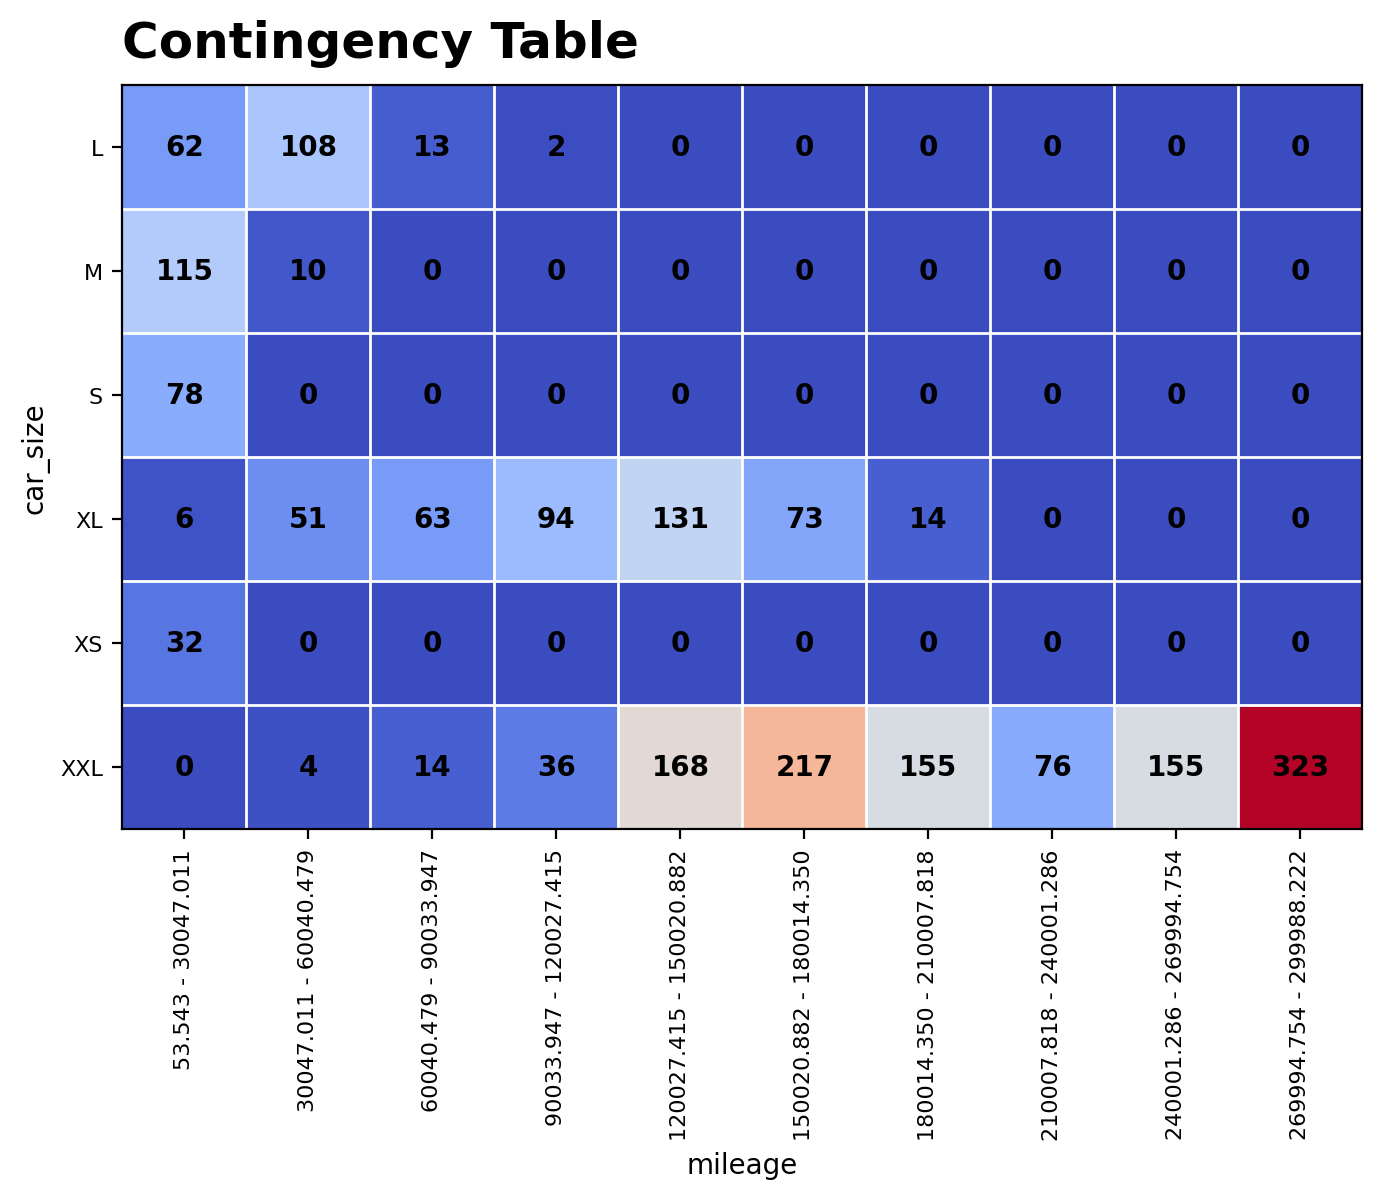

In [9]:
plot_contingency_table(table=ctable, meta=meta)

# Chi-squared statistic

In [10]:
chi_squared_statistic(table=ctable)

2995.253108174877

# Bi-variate normal distribution

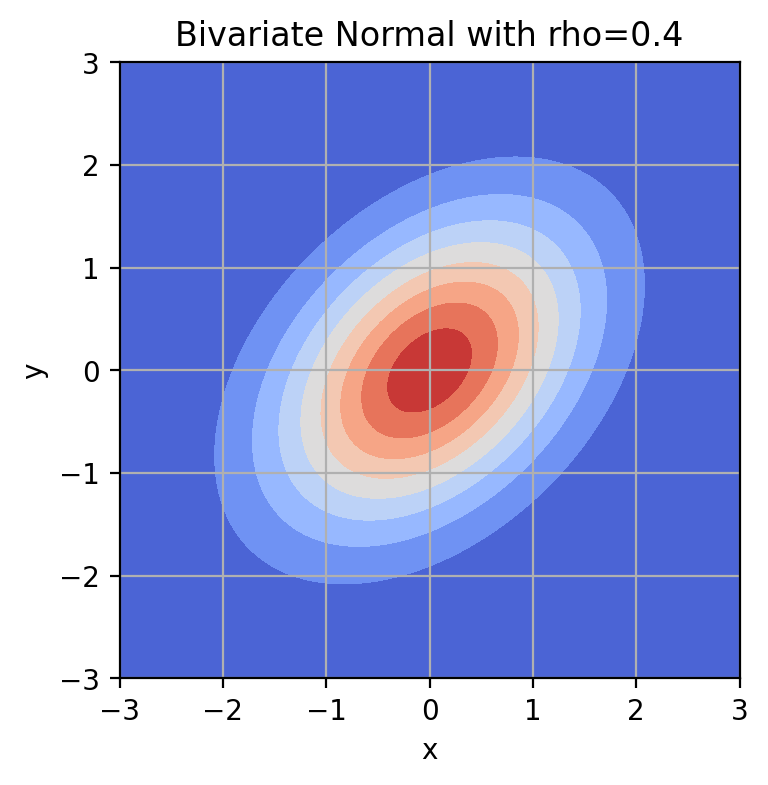

In [11]:
plot_binorm_distr_2d(rho=0.4)

In [24]:
nx, ny = (100, 100)
sx = np.linspace(-5, 5, nx + 1)
sy = np.linspace(-5, 5, ny + 1)

grid = []
for i in range(nx):
    for j in range(ny):
        lower = [sx[i], sy[j]]
        upper = [sx[i + 1], sy[j + 1]]
        grid.append((lower, upper))

In [25]:
# check that total integral is 1

rho = 0.1
mu = np.array([0.0, 0.0])
S = np.array([[1.0, rho], [rho, 1.0]])

s = 0
for (lower, upper) in grid:
    s += calc_integral_between(lower, upper, mu, S)
s

0.999998853395646

In [27]:
rho = 0.77

chi2 = 0
for (lower, upper) in tqdm(grid):
    f_ij_rho = calc_integral_between(lower, upper, mu=np.array([0.0, 0.0]), S=np.array([[1.0, rho], [rho, 1.0]]))
    f_ij_0 = calc_integral_between(lower, upper, mu=np.array([0.0, 0.0]), S=np.array([[1.0, 0.0], [0.0, 1.0]]))
    chi2 += (f_ij_rho - f_ij_0)**2 / f_ij_0

chi2 *= ctable.sum()
chi2

100%|██████████| 10000/10000 [00:00<00:00, 41202.95it/s]


2829.0396500077304